In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import plotly.express as px
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv', sep = ',')
olist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv', sep = ',')
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv', sep = ',')
olist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv', sep = ',')
olist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',')
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv', sep = ',')
olist_products_dataset = pd.read_csv('olist_products_dataset.csv', sep = ',')
olist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', sep = ',')
olist_product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep = ',')

In [2]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
print(olist_customers_dataset.shape)
print(olist_geolocation_dataset.shape)
print(olist_order_items_dataset.shape)
print(olist_order_payments_dataset.shape)
print(olist_order_reviews_dataset.shape)
print(olist_orders_dataset.shape)
print(olist_products_dataset.shape)
print(olist_sellers_dataset.shape)
print(olist_product_category_name_translation.shape)

(99441, 5)
(1000163, 5)
(112650, 7)
(103886, 5)
(99224, 7)
(99441, 8)
(32951, 9)
(3095, 4)
(71, 2)


- Voir quel produit est commander plusieurs fois 
- Voir dans quel état y'a le plus de commande 
- Voir dans quel état y'a le moins de commande 
- Comparer les review avec les orders 
- Voir quel produit est commandé en grande quantité
- Voir quel seller vend le moins
- Voir pour mettre en place des donnée avec une carte 

In [4]:
colors = [(1/256,217/256,132/256), (249/256,185/256,0/256), (241/256,62/256,92/256),\
           (31/256,69/256,232/256)] #Vert, Jaune, Rouge, Bleu 

AttributeError: 'ellipsis' object has no attribute 'sum'

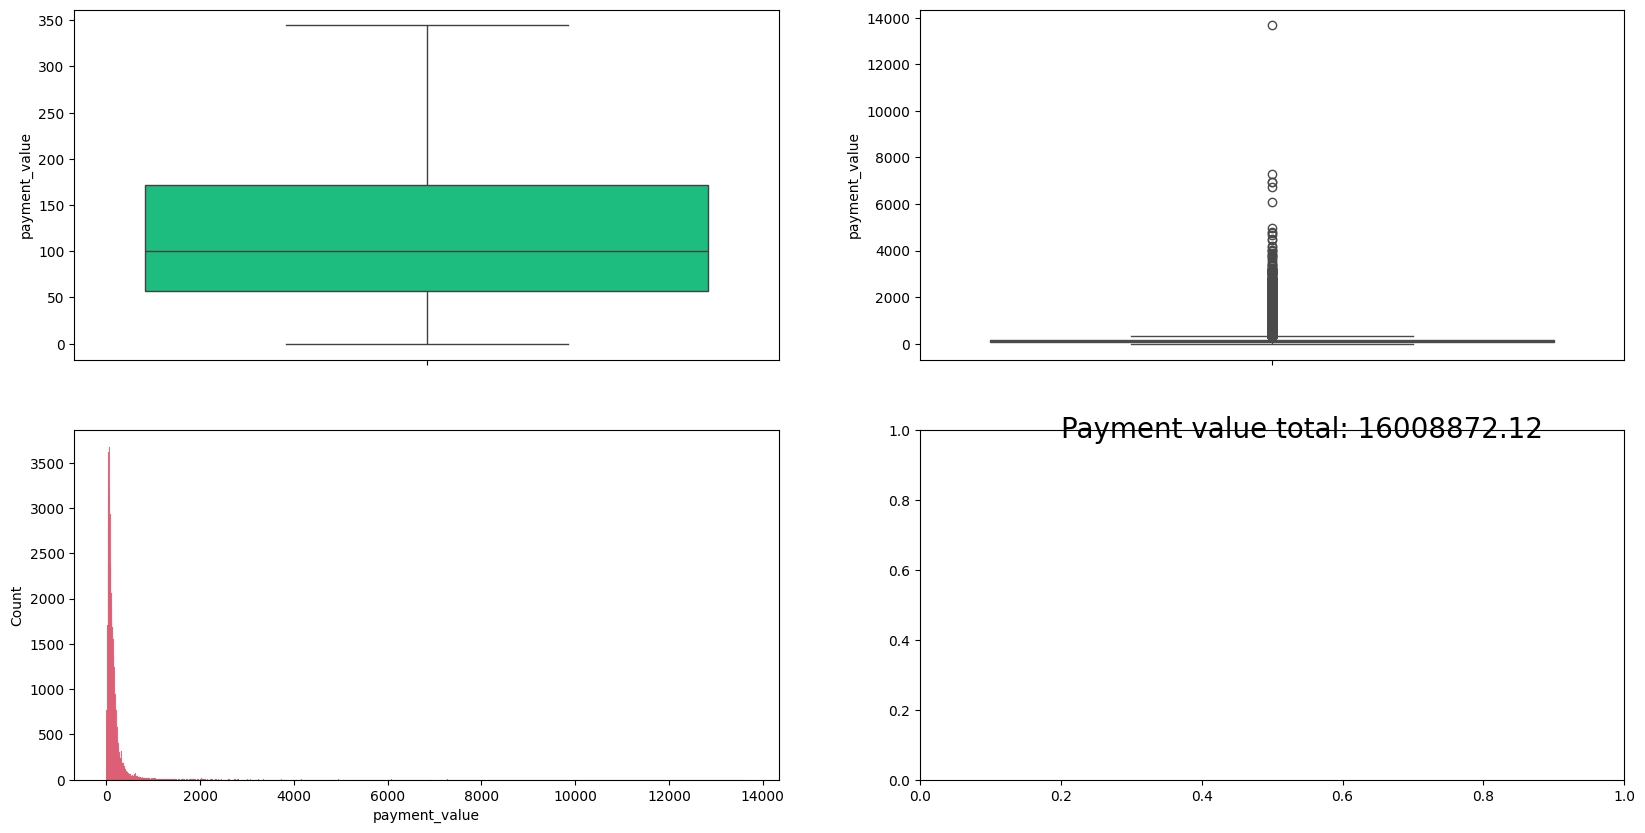

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, squeeze=False, figsize=(20, 10))
sns.boxplot(data=olist_order_payments_dataset['payment_value'], showfliers=False, ax=ax1, color = colors[0])
sns.boxplot(data=olist_order_payments_dataset['payment_value'], showfliers=True, ax=ax2, color = colors[1])
sns.histplot(data=olist_order_payments_dataset['payment_value'], ax=ax3, color = colors[2])
somme_payment = 'Payment value total: ' + str(olist_order_payments_dataset['payment_value'].sum())
ax4.text(0.2, 1.0, somme_payment, fontsize=20, ha='left', va='center') 
somme_payment_wooutlier = 'Payment value total without outliers: ' + str(....sum()) 
ax4.text(0.2, 0.8, somme_payment_wooutlier, fontsize=20, ha='left', va='center')
ax4.axis('off') 
ax1.set_title('Payment sans les valeurs extrêmes')
ax2.set_title('Payment avec les valeurs extrêmes')
ax3.set_title('Histogramme des Payment')

<Axes: ylabel='price'>

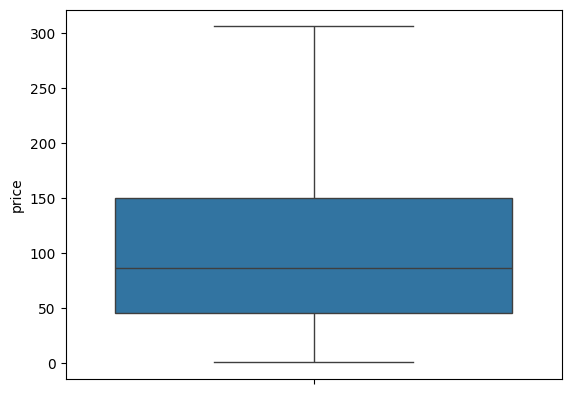

In [6]:
df = olist_order_items_dataset.groupby('order_id')['price'].sum()
sns.boxplot(data=df, showfliers=False)


In [7]:
number_customer_by_state = olist_customers_dataset.groupby('customer_state')['customer_id'].count()
number_customer_by_state = number_customer_by_state.to_frame()
number_customer_by_state = number_customer_by_state.sort_values(by='customer_id', ascending=False)
number_customer_by_state


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


<Axes: xlabel='customer_id', ylabel='customer_state'>

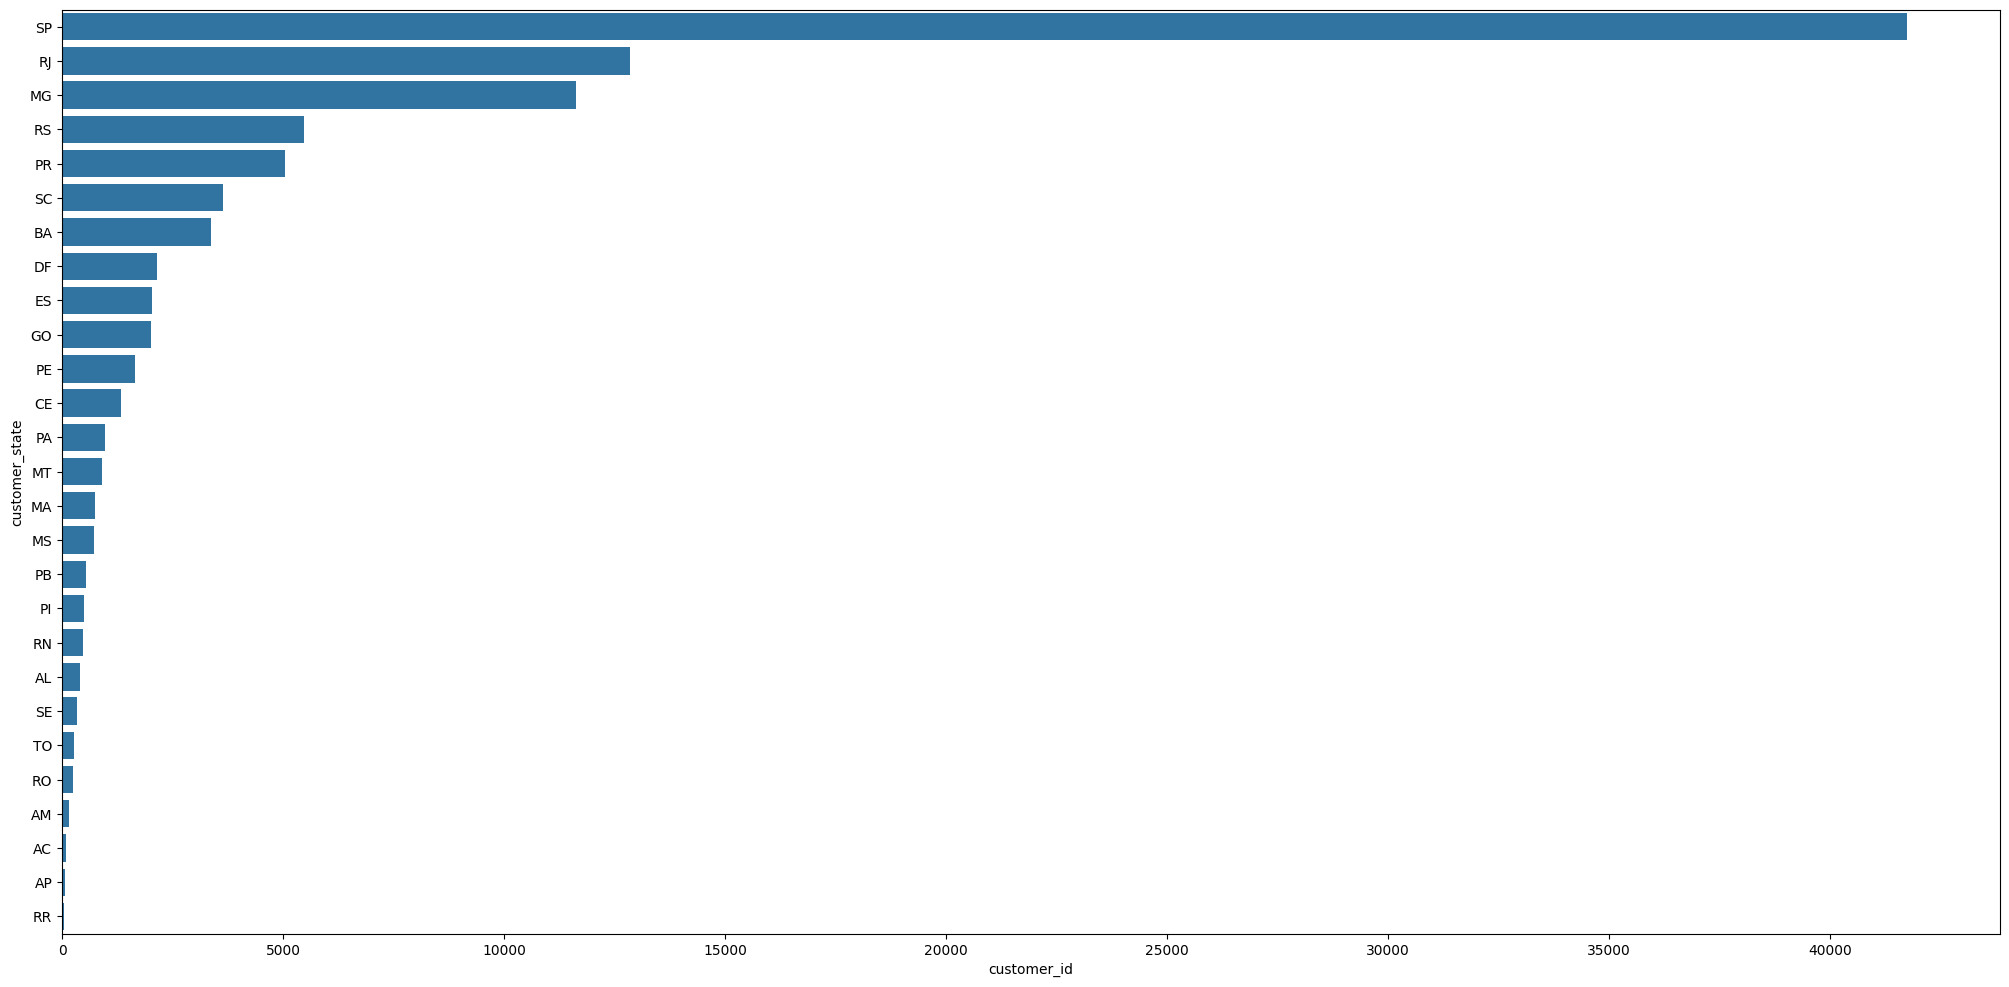

In [8]:
plt.figure(figsize=(25,12))
sns.barplot(x='customer_id', y='customer_state', data=number_customer_by_state)

[Text(0.5, 1.0, 'Quantity of sold items by category of products'),
 Text(0.5, 0, 'Product'),
 Text(0, 0.5, 'Sold items')]

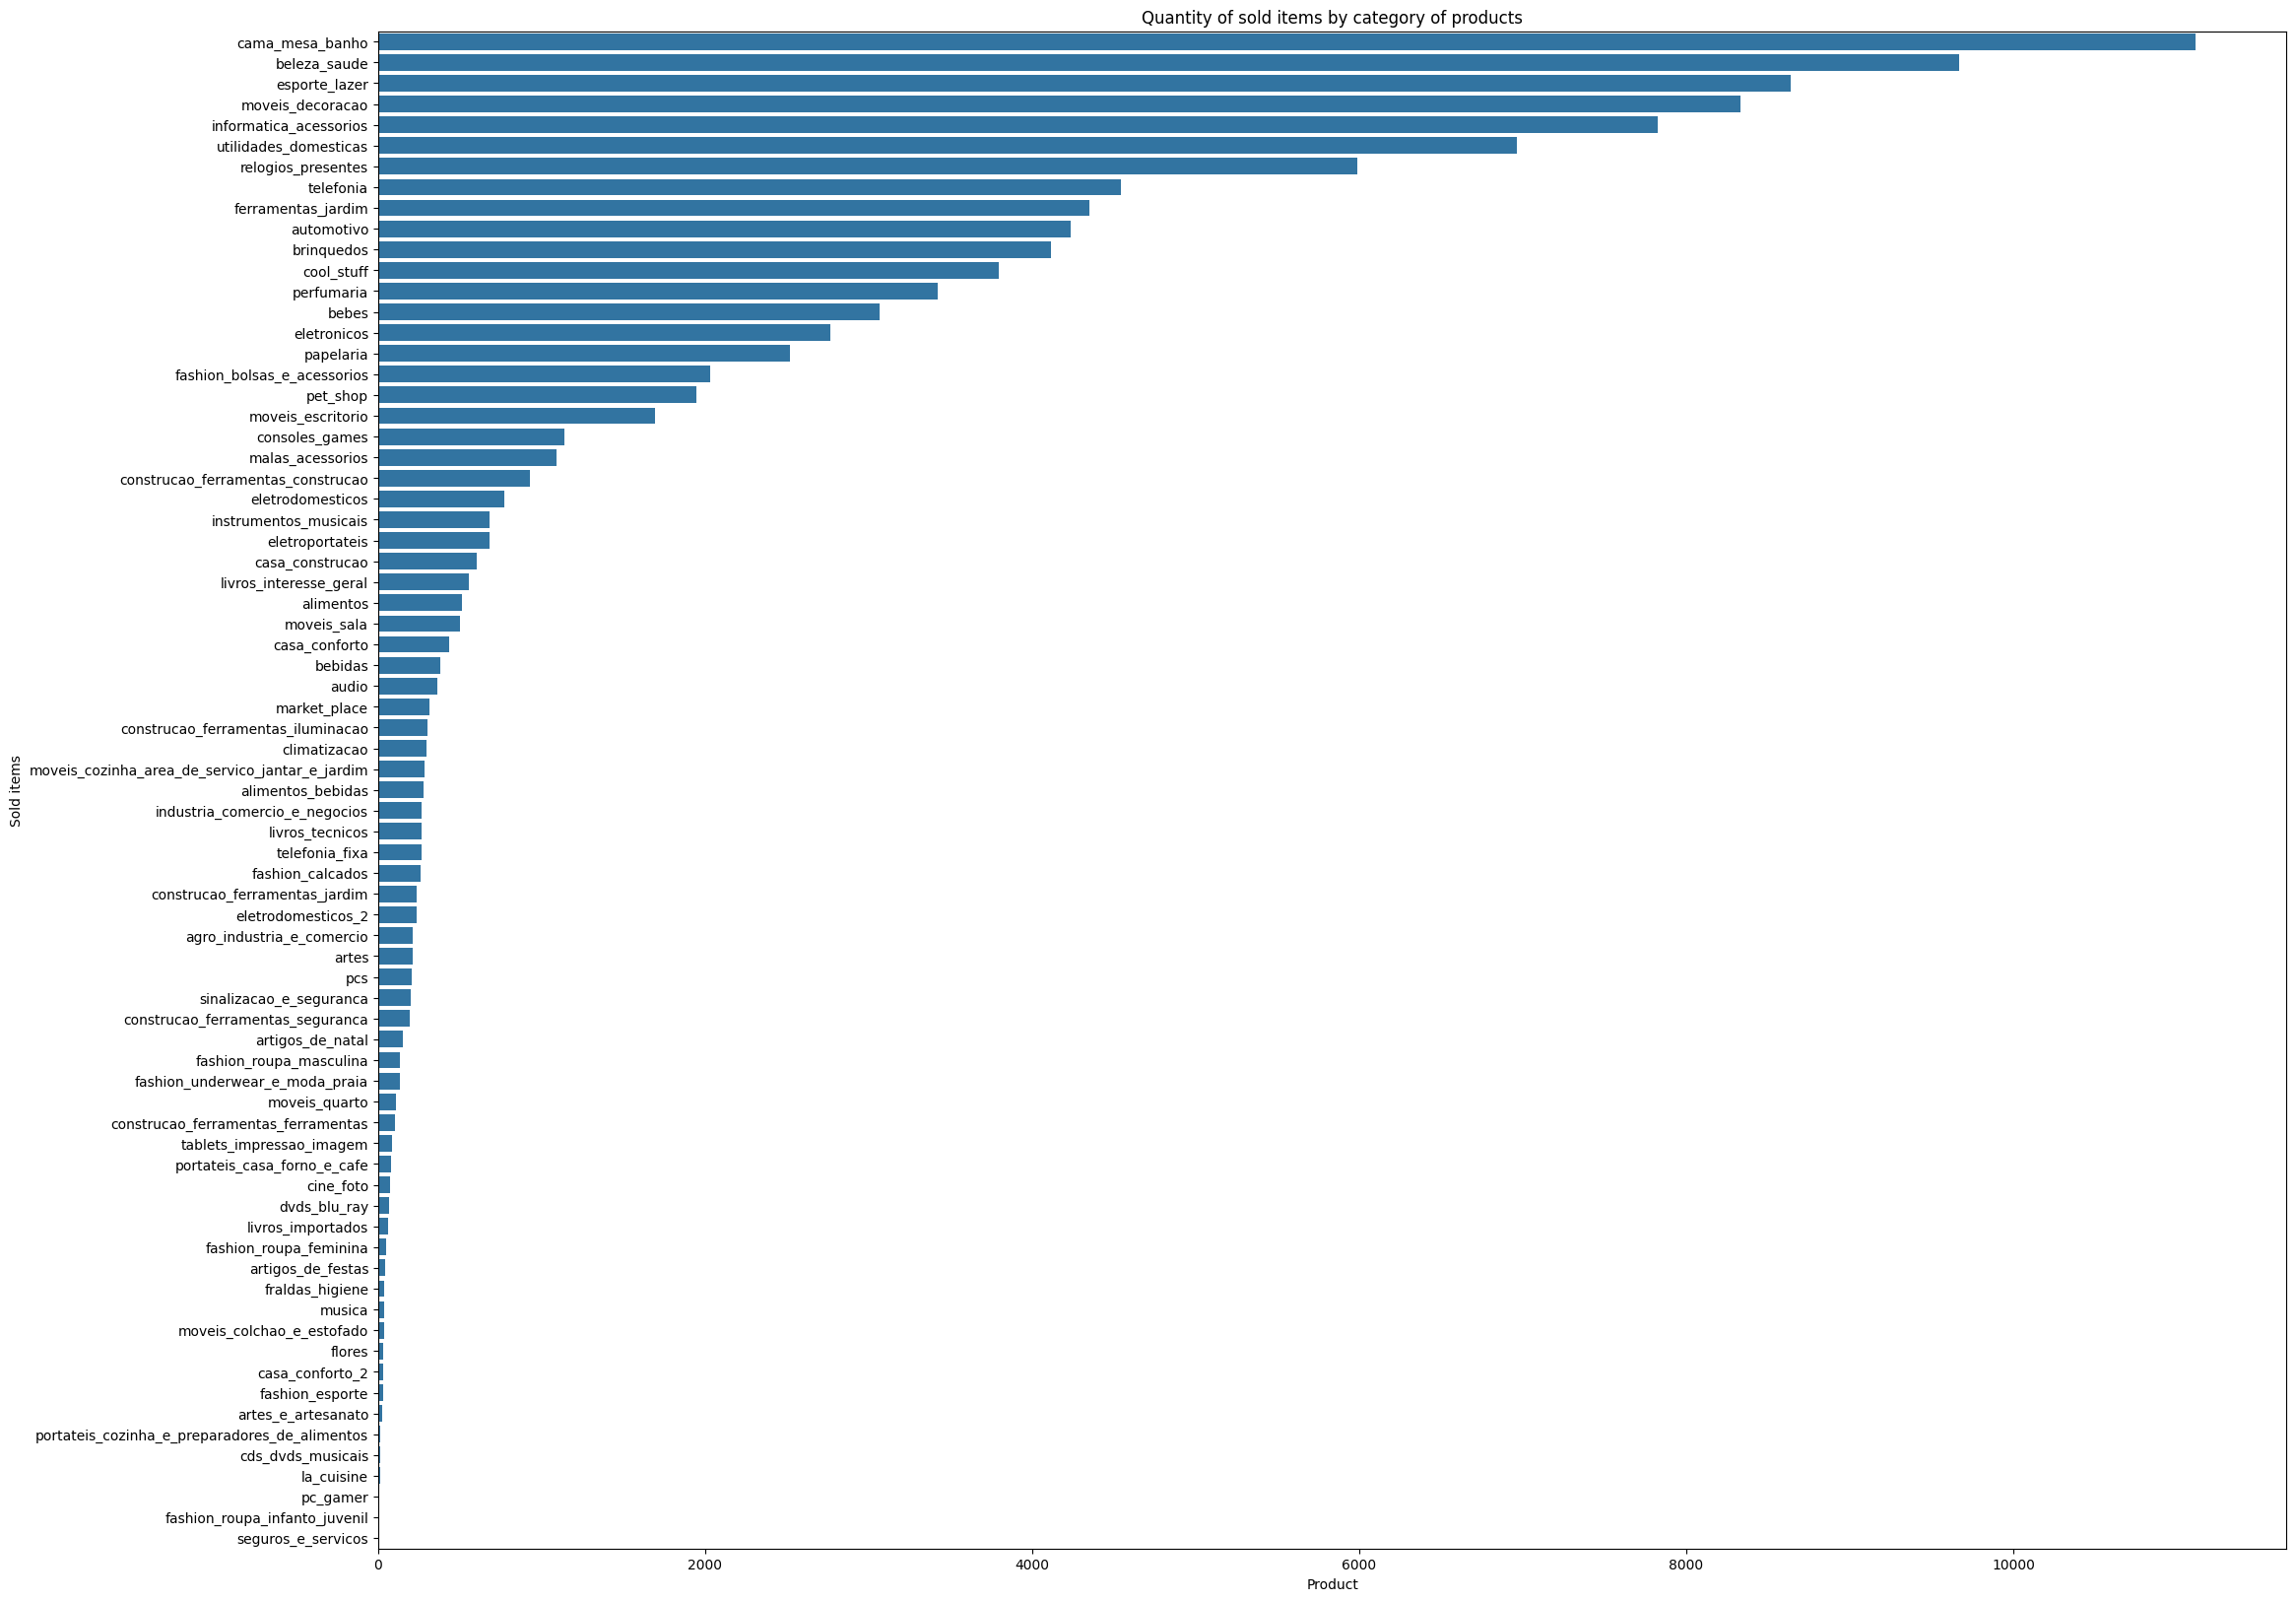

In [9]:
# Display quantity of sold items by category of products

orders_order_items_product = olist_orders_dataset.merge(olist_order_items_dataset, on="order_id", how="inner").merge(olist_products_dataset, on="product_id", how="inner")
orders_order_items_product
df = orders_order_items_product["product_category_name"].value_counts().reset_index()

plt.figure(figsize=(25, 20))

ax = sns.barplot(data=df, x='count', y='product_category_name')
ax.set(title="Quantity of sold items by category of products", xlabel="Product", ylabel="Sold items")


<Axes: xlabel='review_score', ylabel='product_category_name'>

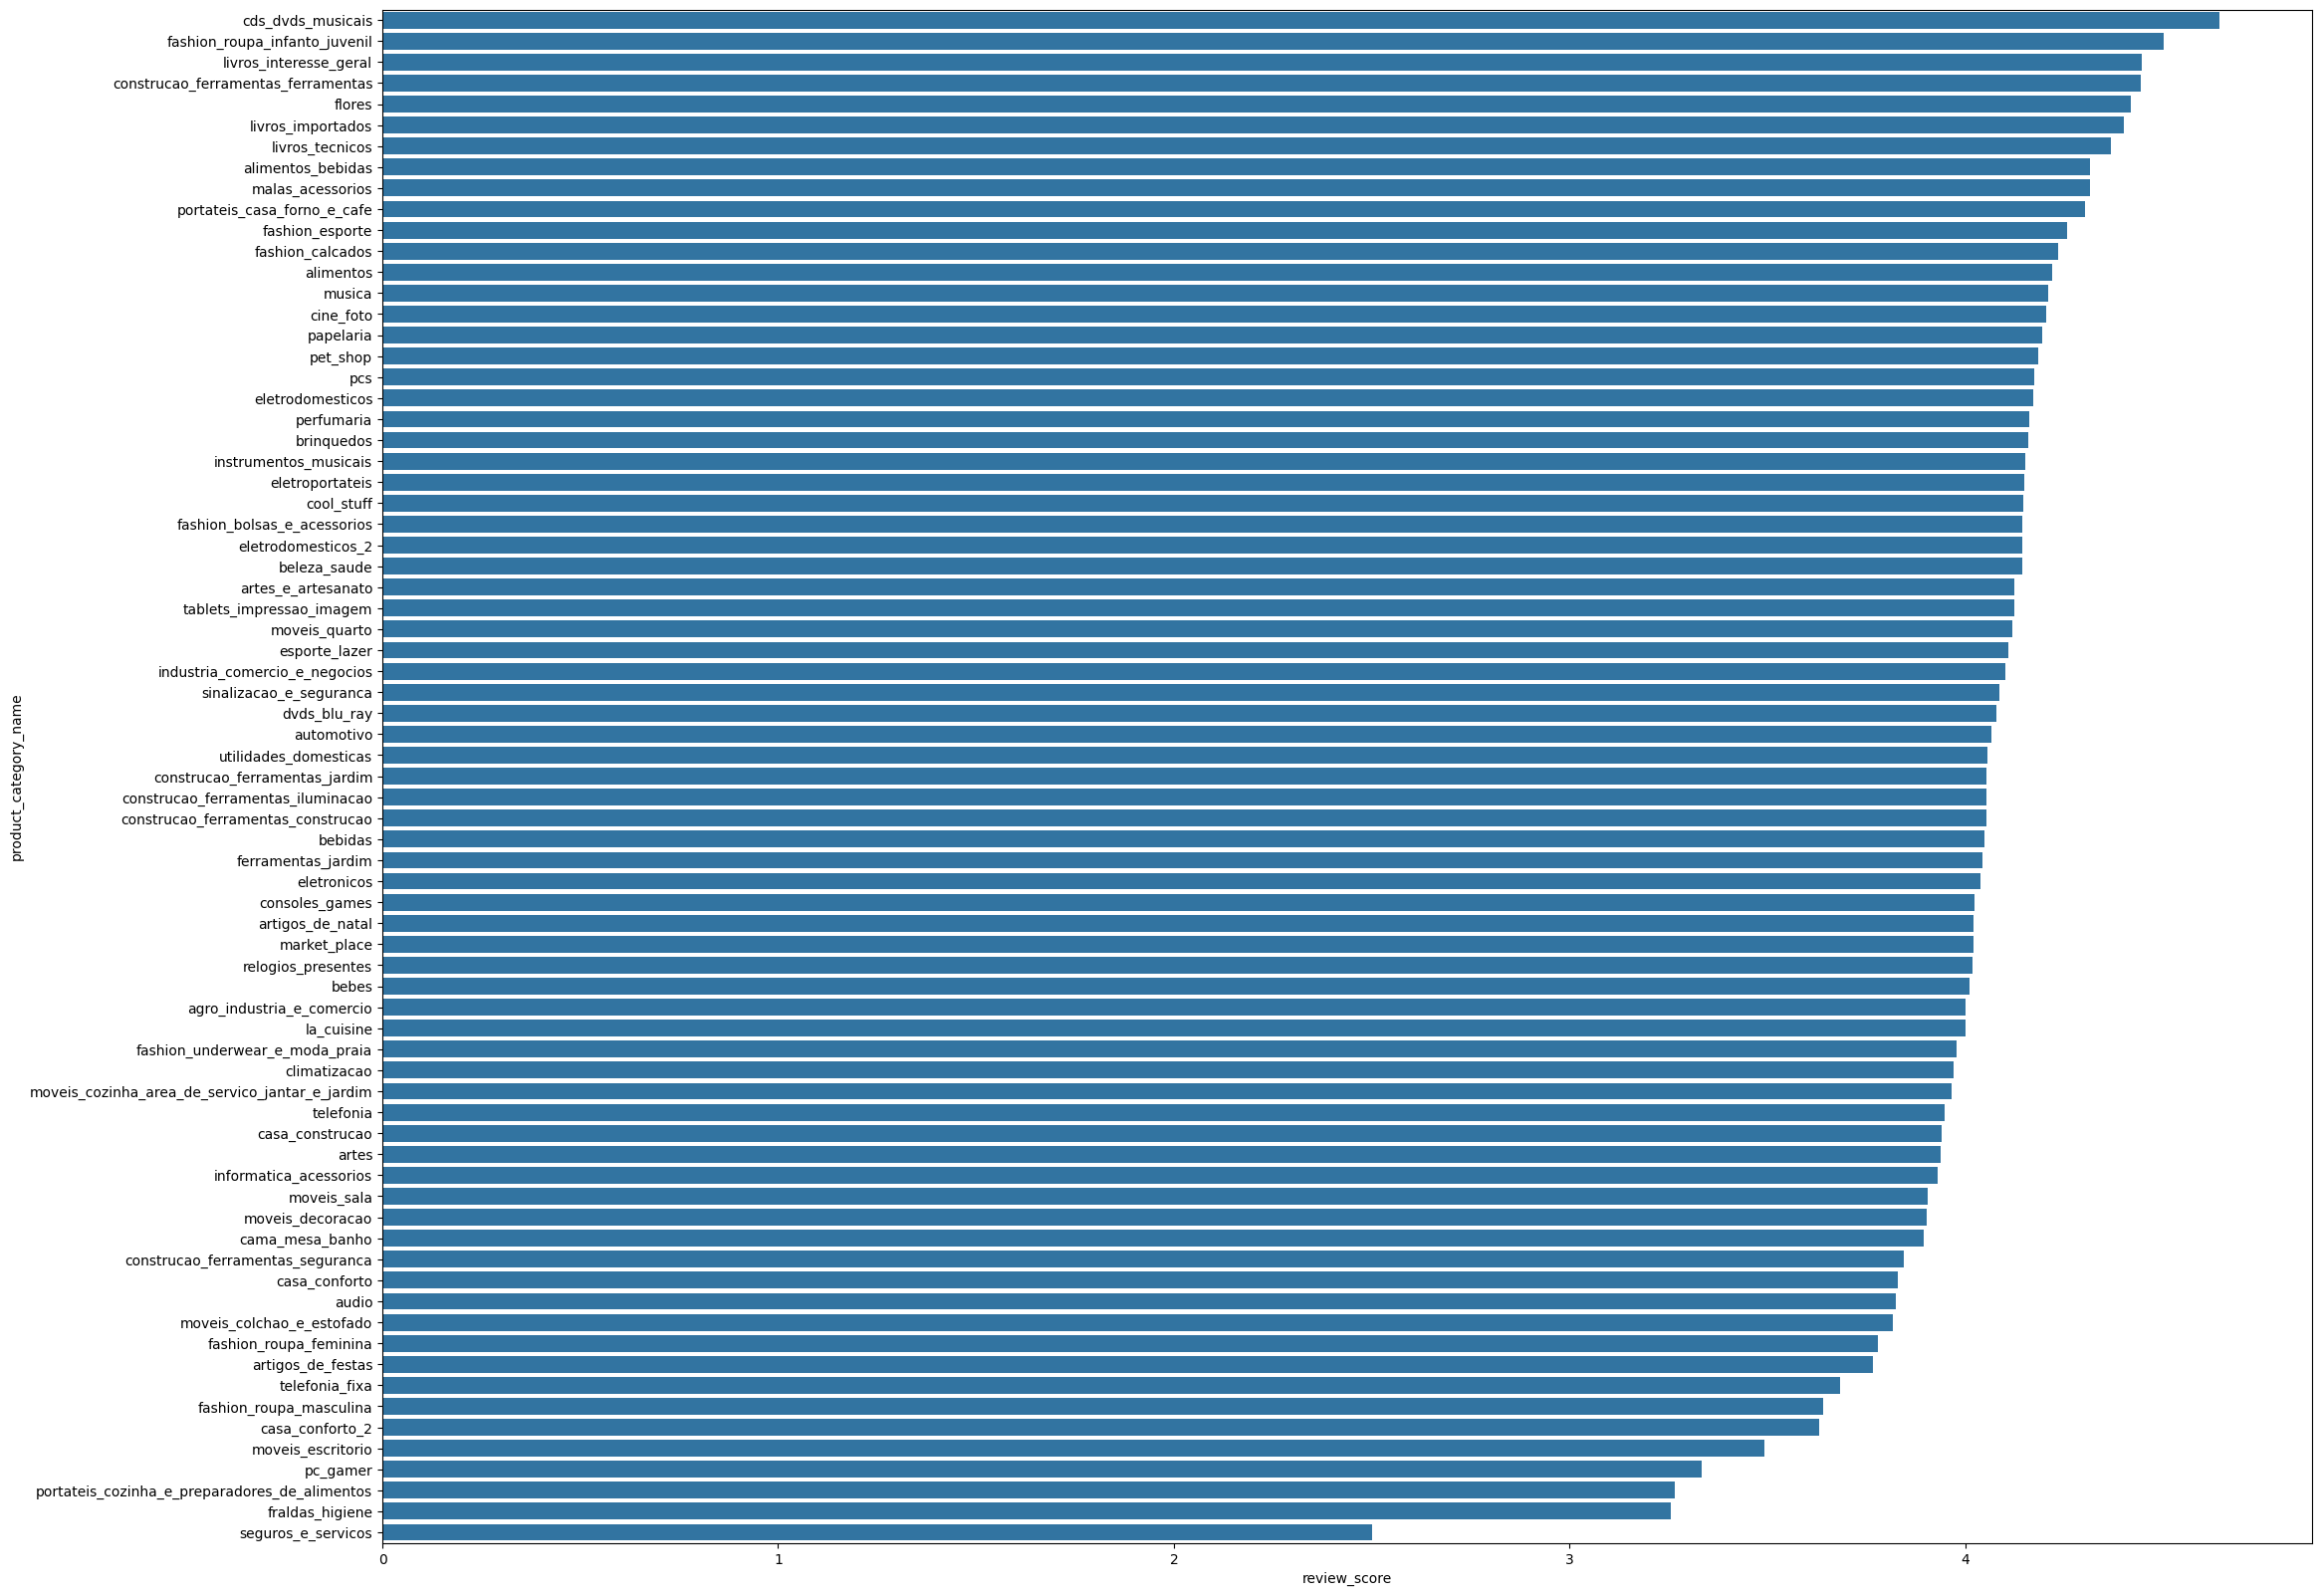

In [10]:
# Analyze reviews for products

df = olist_order_reviews_dataset.merge(olist_orders_dataset, on="order_id", how="inner").merge(olist_order_items_dataset, on="order_id", how="inner").merge(olist_products_dataset, on="product_id", how="inner")

df_reviews_mean = df.groupby("product_category_name")["review_score"].mean().reset_index().sort_values(by="review_score", ascending=False)

plt.figure(figsize=(25, 20), dpi=100)
sns.barplot(y="product_category_name", x="review_score", data=df_reviews_mean)

In [11]:
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5,NaN,NaN,2018-04-10 00:00:00,2018-04-11 11:30:43,b1757da2a461d581e1a3b280ca181b7c,delivered,2018-03-26 11:02:31,...,185.00,20.26,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5,NaN,NaN,2017-12-28 00:00:00,2017-12-30 12:07:50,da2bd16b131bc90653b87fe4d8fd266e,delivered,2017-12-07 20:33:24,...,185.00,17.05,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112367,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00,2018-07-02 23:09:35,9126539aa02befb9271bed176c06c637,delivered,2018-06-21 22:43:32,...,249.90,20.94,papelaria,59.0,1382.0,1.0,803.0,25.0,17.0,20.0
112368,7047578adefcc7c27319e3cf91ba1416,01da5549f136167573c8a302f008557a,5,NaN,"Produto original,prazo de entrega rápido.Super...",2018-04-18 00:00:00,2018-04-22 14:48:57,c6905c5022f61e99e31ded5f939e702b,delivered,2018-04-08 17:01:55,...,150.00,20.02,relogios_presentes,39.0,615.0,1.0,530.0,18.0,9.0,13.0
112369,7e42a39bc8cf4d1eb5897cb48c2889f7,287445be3e2a5f0d3f5036b2a778d1c5,5,NaN,NaN,2018-05-23 00:00:00,2018-05-23 20:40:29,d86567cdc776774d6de508880d117fdd,delivered,2018-05-16 13:29:40,...,59.90,23.00,automotivo,59.0,460.0,6.0,3850.0,47.0,19.0,23.0
112370,586e77c5f02b95285a939083359f8241,5f4a120717a4d152577d7d2ec66c45be,5,NaN,NaN,2018-08-05 00:00:00,2018-08-06 09:48:41,bfa946d6497267cfd3bf8cb0217f6a5b,delivered,2018-07-22 11:50:22,...,161.00,40.34,moveis_cozinha_area_de_servico_jantar_e_jardim,38.0,245.0,1.0,4000.0,31.0,42.0,43.0


<Axes: xlabel='Trimestre', ylabel='Ventes'>

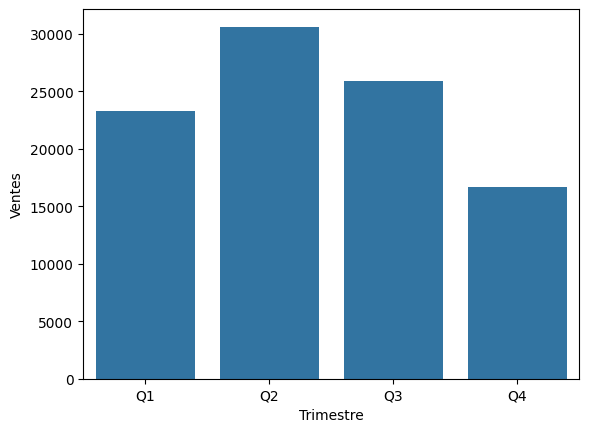

In [19]:
mask_q1 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([1,2,3])
mask_q2 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([4,5,6])
mask_q3 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([7,8,9])
mask_q4 = pd.to_datetime(olist_orders_dataset["order_delivered_customer_date"]).dt.month.isin([10,11,12])
data = [['Q1',len(olist_orders_dataset[mask_q1])],['Q2',len(olist_orders_dataset[mask_q2])],['Q3',len(olist_orders_dataset[mask_q3])],['Q4',len(olist_orders_dataset[mask_q4])]]
data_f = pd.DataFrame(data, columns=['Trimestre', 'Ventes'])
sns.barplot(x='Trimestre',y='Ventes', data=data_f)

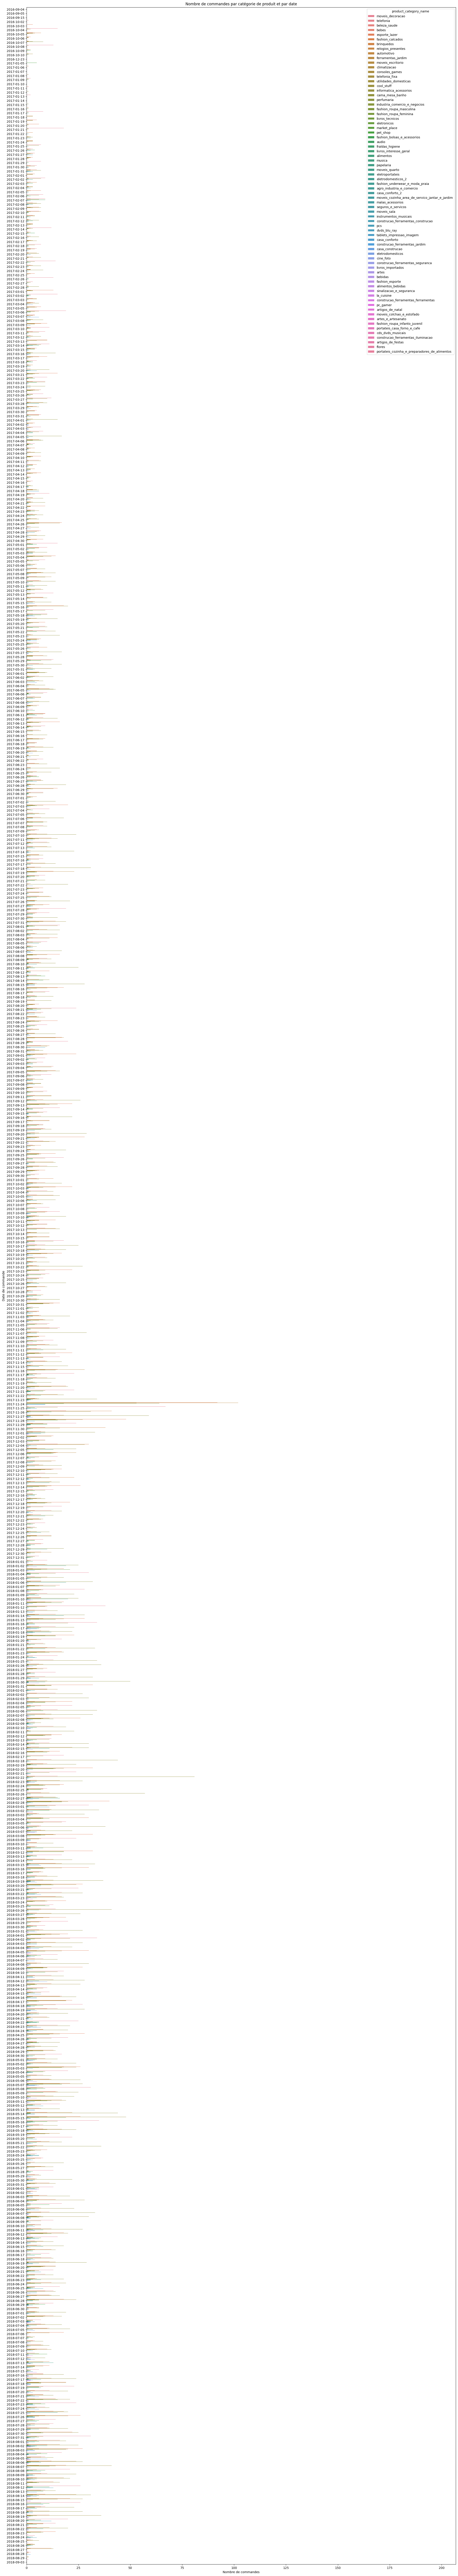

In [12]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df_date_order_mean = df.groupby(["product_category_name", df['order_purchase_timestamp'].dt.date])["order_id"].count().reset_index()
df_date_order_mean.columns = ["product_category_name", "order_date", "order_count"]
df_date_order_mean.sort_values(by="order_date", inplace=True)
plt.figure(figsize=(25, 150), dpi=100)
sns.barplot(x="order_count", y="order_date", hue="product_category_name", data=df_date_order_mean)
plt.title('Nombre de commandes par catégorie de produit et par date')
plt.ylabel('Date de commande')
plt.xlabel('Nombre de commandes')
plt.show()

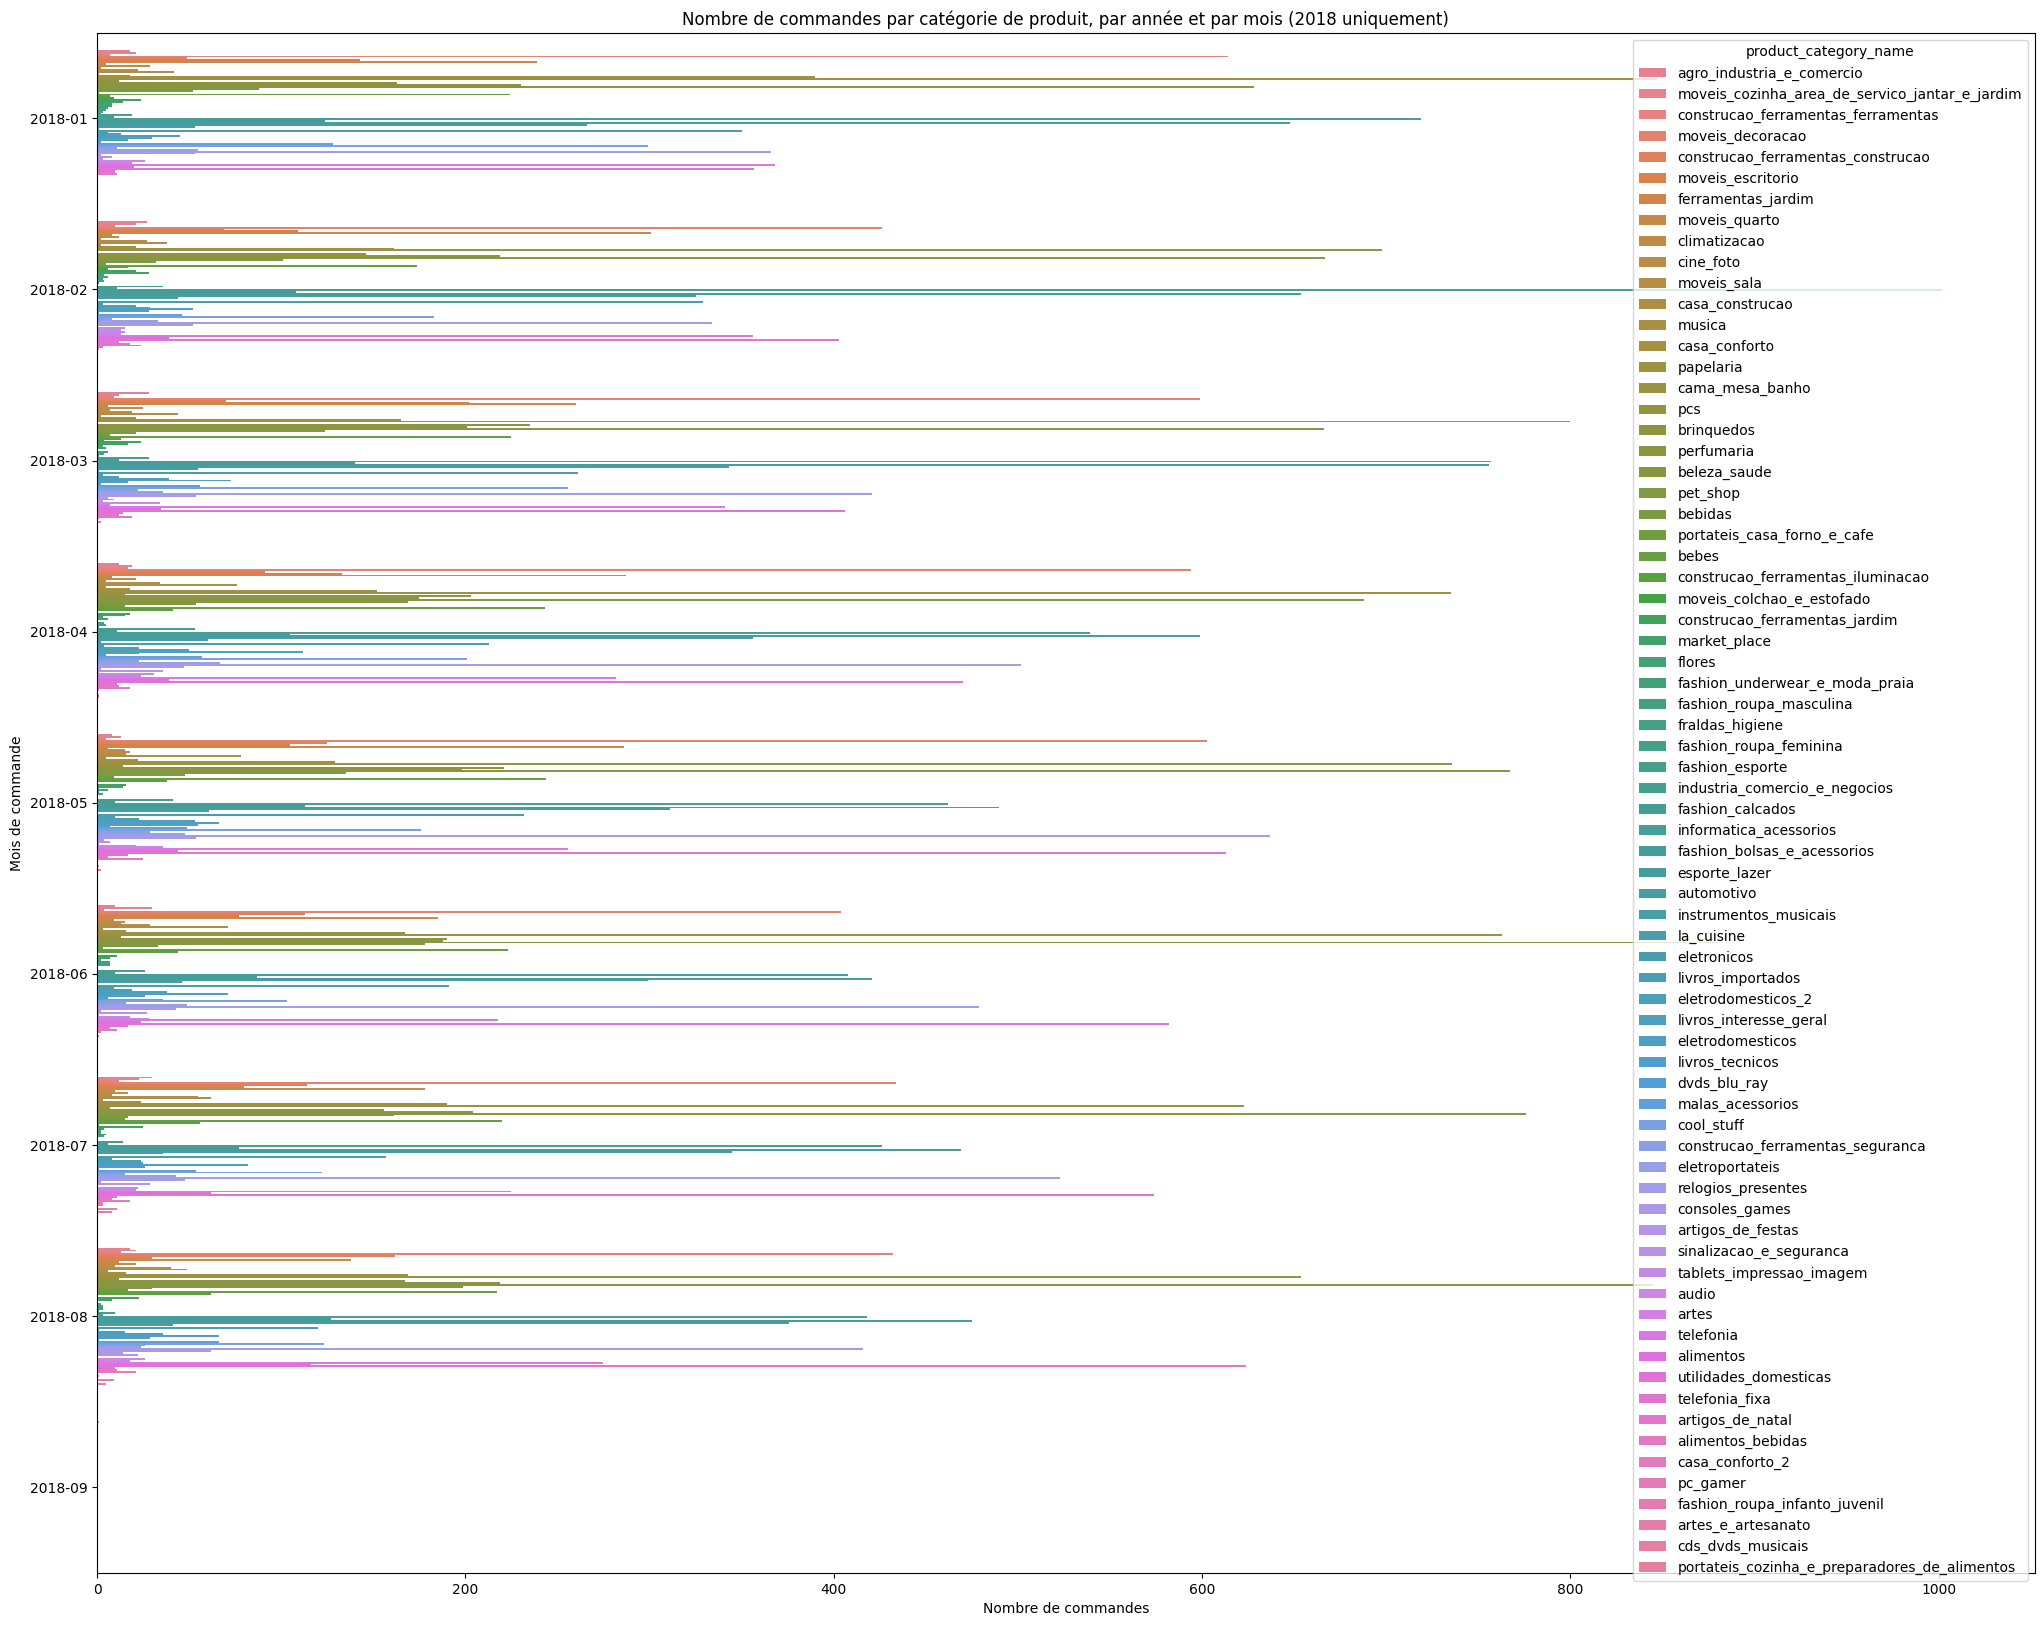

In [63]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df_2018 = df[df['order_purchase_timestamp'].dt.year == 2018]
df_date_order_mean = df_2018.groupby(["product_category_name", "order_year_month"])["order_id"].count().reset_index()
df_date_order_mean.columns = ["product_category_name", "order_year_month", "order_count"]
df_date_order_mean.sort_values(by=["order_year_month"], inplace=True)
plt.figure(figsize=(25, 20), dpi=100)
sns.barplot(x="order_count",y="order_year_month", hue="product_category_name", data=df_date_order_mean)
plt.title('Nombre de commandes par catégorie de produit, par année et par mois (2018 uniquement)')
plt.xlabel('Nombre de commandes')
plt.ylabel('Mois de commande')
plt.show()

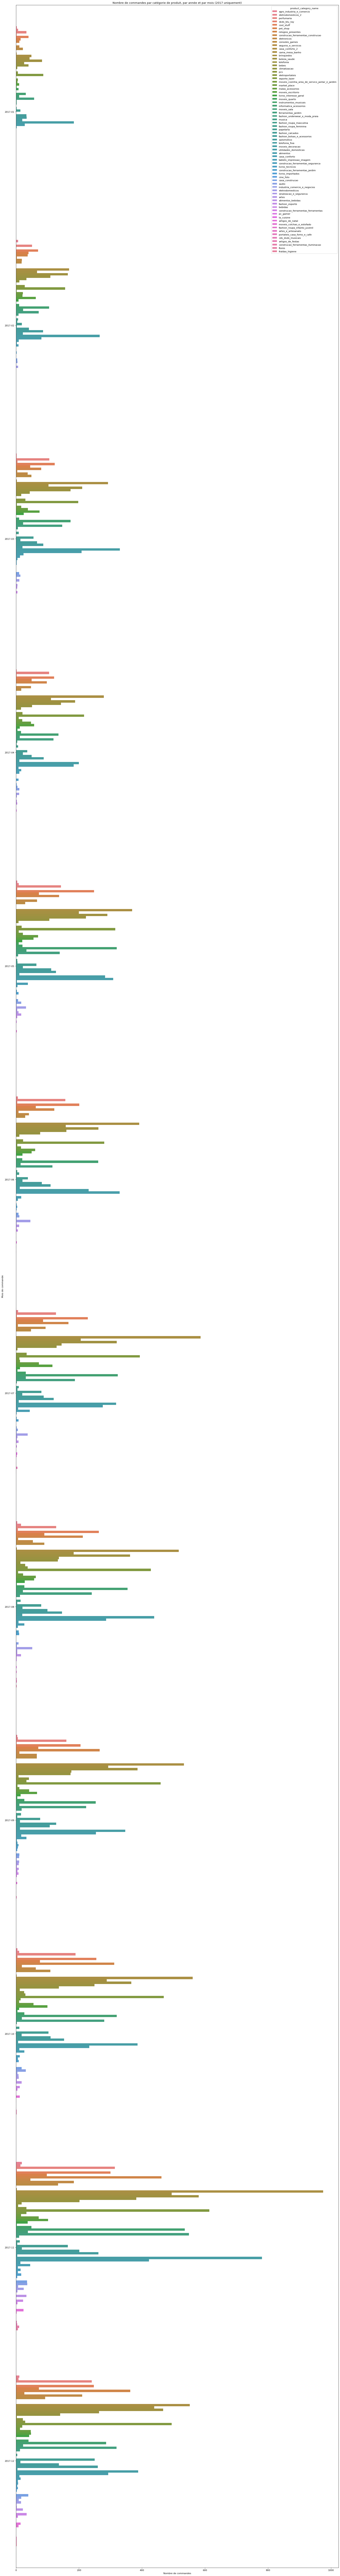

In [70]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df_2017 = df[df['order_purchase_timestamp'].dt.year == 2017]
df_date_order_mean = df_2017.groupby(["product_category_name", "order_year_month"])["order_id"].count().reset_index()
df_date_order_mean.columns = ["product_category_name", "order_year_month", "order_count"]
df_date_order_mean.sort_values(by=["order_year_month"], inplace=True)
plt.figure(figsize=(25, 200), dpi=80)
sns.barplot(x="order_count",y="order_year_month", hue="product_category_name", data=df_date_order_mean)
plt.title('Nombre de commandes par catégorie de produit, par année et par mois (2017 uniquement)')
plt.xlabel('Nombre de commandes')
plt.ylabel('Mois de commande')
plt.show()

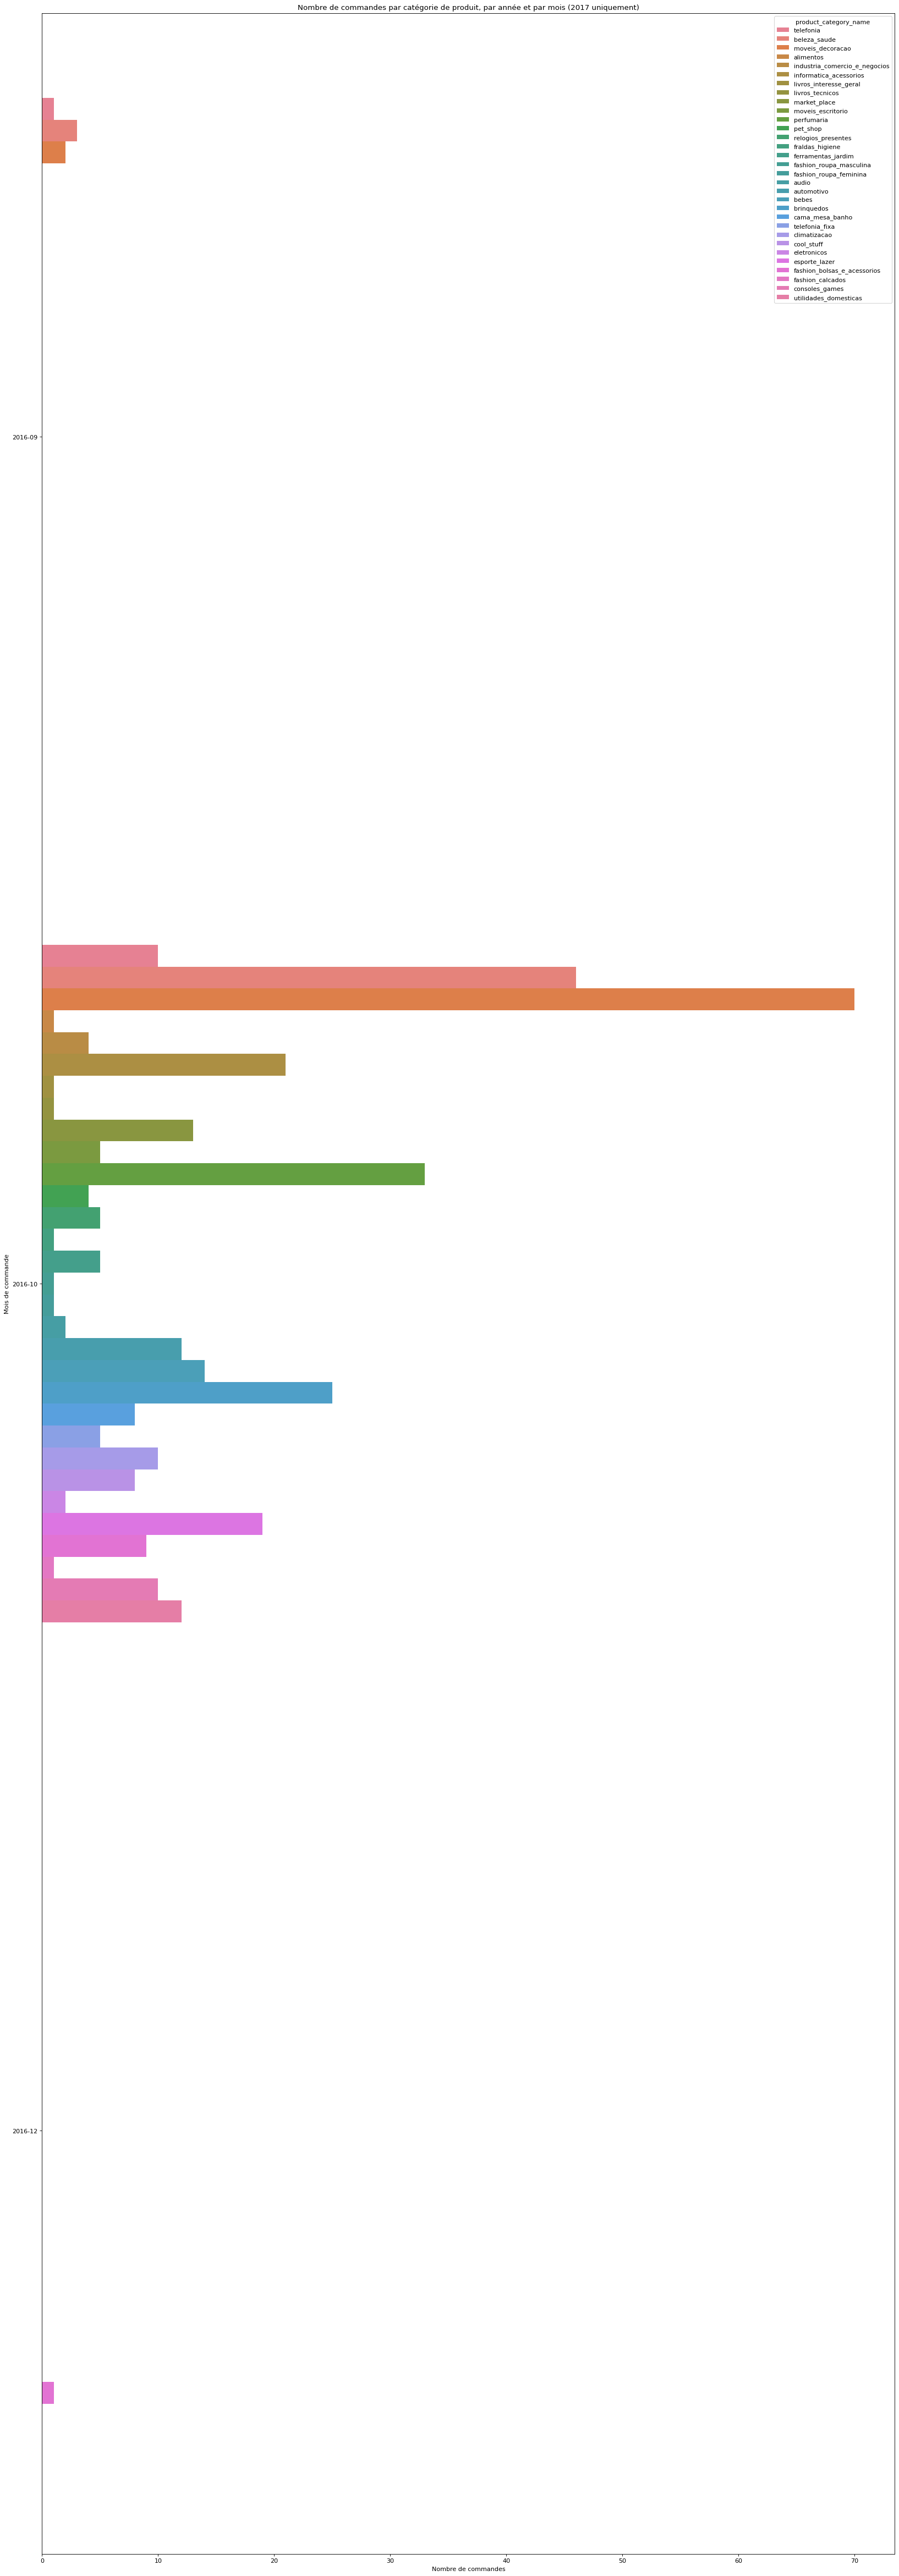

In [69]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_year_month'] = df['order_purchase_timestamp'].dt.to_period('M')
df_2016 = df[df['order_purchase_timestamp'].dt.year == 2016]
df_date_order_mean = df_2016.groupby(["product_category_name", "order_year_month"])["order_id"].count().reset_index()
df_date_order_mean.columns = ["product_category_name", "order_year_month", "order_count"]
df_date_order_mean.sort_values(by=["order_year_month"], inplace=True)
plt.figure(figsize=(25, 75), dpi=80)
sns.barplot(x="order_count",y="order_year_month", hue="product_category_name", data=df_date_order_mean)
plt.title('Nombre de commandes par catégorie de produit, par année et par mois (2017 uniquement)')
plt.xlabel('Nombre de commandes')
plt.ylabel('Mois de commande')
plt.show()

In [8]:
df_unique_sellers = olist_sellers_dataset.drop_duplicates(subset='seller_id', keep='first')
brazil_map = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)
geolocator = Nominatim(user_agent="my_geocoder")
for index, row in df_unique_sellers.iterrows():
    try:
        location = geolocator.geocode(row['seller_city'], timeout=10)
    except GeocoderTimedOut as e:
        print(f"Erreur de géocodage pour {row['seller_city']}: {e}")
        location = None
    if location:
        folium.Marker(
            location=[location.latitude, location.longitude],
            popup=row['seller_city'],
        ).add_to(brazil_map)

brazil_map.save('map_unique_sellers.html')

In [13]:
df_merged = pd.merge(olist_customers_dataset, olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_merged

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...
15083450,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.821866,-49.244027,aparecida de goiania,GO
15083451,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.821866,-49.244027,aparecida de goiania,GO
15083452,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,74980,-16.822945,-49.244615,aparecida de goiania,GO
15083453,6fb4f2354f36e554ac80141e9128f528,3cc6f2e1b9199837fabb35ff4bf24884,99043,passo fundo,RS,99043,-28.226596,-52.467505,passo fundo,RS


In [ ]:
brazil_map = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=f"Customer ID: {row['customer_id']}\nCity: {row['geolocation_city']}",
    ).add_to(brazil_map)

brazil_map.save('customer_map.html')

In [16]:
df_mergeddd = pd.concat([olist_customers_dataset, olist_geolocation_dataset], axis=1)
df_mergeddd

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,1037,-23.545621,-46.639292,sao paulo,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,1046,-23.546081,-46.644820,sao paulo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,1046,-23.546129,-46.642951,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,1041,-23.544392,-46.639499,sao paulo,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...
1000158,NaN,NaN,NaN,NaN,NaN,99950,-28.068639,-52.010705,tapejara,RS
1000159,NaN,NaN,NaN,NaN,NaN,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,NaN,NaN,NaN,NaN,NaN,99950,-28.071855,-52.014716,tapejara,RS
1000161,NaN,NaN,NaN,NaN,NaN,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
df_merged = pd.merge(olist_customers_dataset, olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_unique_customers = df_merged.drop_duplicates(subset='customer_id', keep='first')
brazil_map = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)
marker_cluster = MarkerCluster().add_to(brazil_map) # reduit le nombre de points si ils sont les uns à coté des autres 
for index, row in df_unique_customers.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=row['customer_city'],
    ).add_to(brazil_map)

brazil_map.save('map_unique_customers2.html')

In [ ]:
df_mergedd = pd.merge(olist_customers_dataset, olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_unique_customers = df_mergedd.drop_duplicates(subset='customer_id', keep='first')

fig = px.scatter_geo(df_unique_customers,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     hover_name='customer_city',
                     projection='natural earth',
                     title='Customers map',
                     color_discrete_sequence=['red'],
                     height=800,
                     width=800)

fig.show()

In [ ]:
df_mergeddd = pd.merge(olist_sellers_dataset, olist_geolocation_dataset, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_unique_sellers= df_mergeddd.drop_duplicates(subset='seller_id', keep='first')

fig = px.scatter_geo(df_unique_sellers,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     hover_name='seller_city',
                     projection='natural earth',
                     title='Seller map',
                     color_discrete_sequence=['blue'],
                     height=800,
                     width=800)

fig.show()

In [ ]:
df_mergedd = pd.merge(olist_customers_dataset, olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_unique_customers = df_mergedd.drop_duplicates(subset='customer_id', keep='first')

fig1 = px.scatter_geo(df_unique_customers,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     hover_name='customer_city',
                     projection='natural earth',
                     color_discrete_sequence=['red'])

df_mergeddd = pd.merge(olist_sellers_dataset, olist_geolocation_dataset, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_unique_sellers= df_mergeddd.drop_duplicates(subset='seller_id', keep='first')

fig2 = px.scatter_geo(df_unique_sellers,
                     lat='geolocation_lat',
                     lon='geolocation_lng',
                     hover_name='seller_city',
                     projection='natural earth',
                     color_discrete_sequence=['blue'])

fig = fig1.add_trace(fig2.data[0])

fig.show()

In [ ]:
df_merged = pd.merge(olist_sellers_dataset, olist_geolocation_dataset, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df_unique_sellers = df_merged.drop_duplicates(subset='seller_id', keep='first')
brazil_map_sellers = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)
marker_cluster = MarkerCluster().add_to(brazil_map_sellers) # reduit le nombre de points si ils sont les uns à coté des autres 
for index, row in df_unique_sellers.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        popup=row['seller_city'],
    ).add_to(brazil_map_sellers)

brazil_map_sellers